In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터를 읽기.
# 컬림 이름 변경.
column_list = ['임신횟수', '혈당', '혈압', '근육피부두께', '인슐린', '체질량', '가족력', '나이', '당뇨여부']
df = pd.read_csv('data/pima-indians-diabetes.csv', names = column_list)
df.head(10)

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# 전반적인 정보를 확인.
# 결측은 없어보임.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신횟수    768 non-null    int64  
 1   혈당      768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   근육피부두께  768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   체질량     768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   당뇨여부    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 다시 한 번 결측 확인.
df.isna().sum()

임신횟수      0
혈당        0
혈압        0
근육피부두께    0
인슐린       0
체질량       0
가족력       0
나이        0
당뇨여부      0
dtype: int64

In [5]:
# 기술통게량 확인.
df.describe()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 컬럼간의 상관관계 파악.
df.corr()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
임신횟수,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
혈당,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
근육피부두께,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
인슐린,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
체질량,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
가족력,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
당뇨여부,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


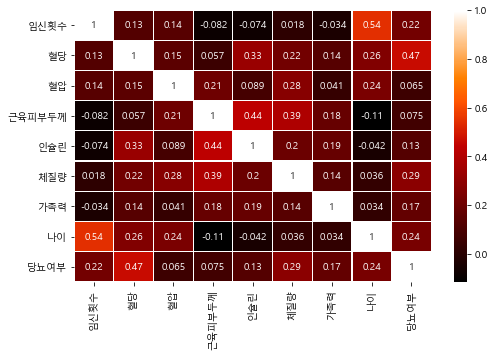

In [7]:
# Hitmap 작성.
# 각 컬럼의 상관관계를 한눈에 볼수 있도록 고안된 그래프.
# 첫 번째 : 각 컬럼간 상관관계 수치를 가진 데이터 프레임.
# linewidths : 외곽선 두께.
# vmax : 색상의 농도.
# cmap : 컬러 맵.
# linecolor : 외곽선 색상.
# annot : True를 주면 각 칸에 수치를 표시.
plt.figure(figsize=(8,5))
sb.heatmap(df.corr(), linewidths=0.1, vmax=1, cmap = plt.cm.gist_heat,linecolor='white', annot=True)
plt.show()

In [8]:
# Seed값 설정.
np.random.seed(3)
tf.random.set_seed(3)

In [9]:
# 입력과 결과 데이터 분할.
X = df.drop('당뇨여부', axis=1)
Y = df['당뇨여부']

In [10]:
# 모델 설정.
model = Sequential()

# 8개의 노드로 이루어진 1개의 출력층과 6개의 은닉층 구성.
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

# 출력층 구성.
# 타겟 데이터가 이진형이였으므로 활성화 함수로 sigmoid 적용.
model.add(Dense(1, activation='sigmoid' ))

# 모델 컴파일.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 학습.
# 시작 시간.
now = time.time()

# 모든 데이터를 훈련용 데이터셋으로 가정하고 진행.
model.fit(X, Y, epochs=200, batch_size=10, verbose=0)

# 경과 시간 확인.
print(f'경과시간 : {round(time.time() - now)}초')

# 정확도 확인.
print(f'정확도 : {round(model.evaluate(X, Y)[1], 3)}%')

경과시간 : 45초
24/24 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8203
정확도 : 0.82%
